In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import scipy.optimize as so
from astropy.coordinates import SkyCoord

utils_dir = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/src/utils'
if not utils_dir in sys.path: sys.path.append(utils_dir)
from constants import *
from CosmoFunc import *

# Plot configurations
GOLDEN_RATIO = 0.5*(1+np.sqrt(5))
FIGURE_HEIGHT = 5
FIGURE_WIDTH = FIGURE_HEIGHT*GOLDEN_RATIO
DEFAULT_FIGSIZE = (FIGURE_WIDTH, FIGURE_HEIGHT)

ROOT_PATH = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0'

# 1. Prepare input file (extinction data)

## 1.1. 6dFGS

## 1.2. SDSS

In [13]:
# Load recent data
df = pd.read_csv('/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/data/processed/rsi_derived/sdss.csv')
df = df[['tmass', 'ra', 'dec', 'extinction_j', 'extinction_h', 'extinction_k']].rename(columns={'tmass': 'obsid', 'extinction_j': 'SF11_J', 'extinction_h': 'SF11_H', 'extinction_k': 'SF11_K'})

# Convert equatorial to Galactic coordinates
coords = SkyCoord(df['ra'], df['dec'], unit='deg', frame ='fk5')
coords_gal = coords.transform_to('galactic')
df['l'] = coords_gal.l.value
df['b'] = coords_gal.b.value

# Set the SFD extinctions as 0 (we don't use them anyway)
df['SFD98_J'] = 0
df['SFD98_H'] = 0
df['SFD98_K'] = 0

# Save to SDSS folder
df = df[['obsid', 'ra', 'dec', 'l', 'b', 'SFD98_J', 'SF11_J', 'SFD98_H', 'SF11_H', 'SFD98_K', 'SF11_K']]
df.to_csv("GENRMOCKFP_SDSS/SDSS_FP_extinctions.csv", index=False)

,obsid,ra,dec,SF11_J,SF11_H,SF11_K
0,2MASXJ14213079+1757463,215.378296,17.962866,0.015514,0.009871,0.006652
1,2MASXJ10193574+4240552,154.898942,42.682025,0.009840,0.006261,0.004219
2,2MASXJ08262749+5439122,126.614558,54.653416,0.032485,0.020668,0.013929
3,2MASXJ13120148+2549521,198.006197,25.831158,0.009484,0.006034,0.004066
4,2MASXJ11142839+4133276,168.618317,41.557665,0.010113,0.006434,0.004336
...,...,...,...,...,...,...
29301,2MASXJ08121231+2440530,123.051512,24.681174,0.038415,0.024441,0.016471
29302,2MASXJ10284733+5921379,157.197719,59.360377,0.005041,0.003207,0.002161
29303,2MASXJ10323633+1330027,158.151385,13.500454,0.021769,0.013850,0.009334
29304,2MASXJ09465604+0200277,146.733266,2.007527,0.095693,0.060883,0.041030


## 1.3. LAMOST

In [3]:
# Load recent data
df = pd.read_csv('/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/data/processed/rsi_derived/lamost.csv')
df = df[['tmass', 'ra', 'dec', 'extinction_j', 'extinction_h', 'extinction_k']].rename(columns={'tmass': 'obsid', 'extinction_j': 'SF11_J', 'extinction_h': 'SF11_H', 'extinction_k': 'SF11_K'})

# Convert equatorial to Galactic coordinates
coords = SkyCoord(df['ra'], df['dec'], unit='deg', frame ='fk5')
coords_gal = coords.transform_to('galactic')
df['l'] = coords_gal.l.value
df['b'] = coords_gal.b.value

# Set the SFD extinctions as 0 (we don't use them anyway)
df['SFD98_J'] = 0
df['SFD98_H'] = 0
df['SFD98_K'] = 0

# Save to SDSS folder
df = df[['obsid', 'ra', 'dec', 'l', 'b', 'SFD98_J', 'SF11_J', 'SFD98_H', 'SF11_H', 'SFD98_K', 'SF11_K']]
df
# df.to_csv("GENRMOCKFP_SDSS/SDSS_FP_extinctions.csv", index=False)

,obsid,ra,dec,l,b,SFD98_J,SF11_J,SFD98_H,SF11_H,SFD98_K,SF11_K
0,2MASXJ12592287+7657369,194.845306,76.960274,122.345765,40.158936,0,0.023361,0,0.014863,0,0.010017
1,2MASXJ12553043+7403026,193.876801,74.050728,122.549241,43.074499,0,0.014629,0,0.009308,0,0.006273
2,2MASXJ12444528+7618484,191.188705,76.313469,123.454140,40.808005,0,0.025170,0,0.016014,0,0.010792
3,2MASXJ13133432+7603367,198.393005,76.060211,121.168302,40.992155,0,0.021562,0,0.013718,0,0.009245
4,2MASXJ12563585+6221087,194.149399,62.352428,121.894445,54.765428,0,0.010428,0,0.006635,0,0.004471
...,...,...,...,...,...,...,...,...,...,...,...
61688,2MASXJ08114837+1511338,122.951100,15.192708,207.757736,24.490569,0,0.025096,0,0.015967,0,0.010760
61689,2MASXJ15210000+0457301,230.250095,4.957917,7.783526,48.062163,0,0.028799,0,0.018323,0,0.012348
61690,2MASXJ12024226+0158363,180.676000,1.977336,275.976156,62.270974,0,0.016210,0,0.010313,0,0.006950
61691,2MASXJ10222793+3607584,155.617040,36.133147,187.577192,57.256358,0,0.009055,0,0.005761,0,0.003882


# 2. Characterize veldisp error

## 2.1. 6dFGS

## 2.2. SDSS

-4.7062286997585625
0.2598697930249457


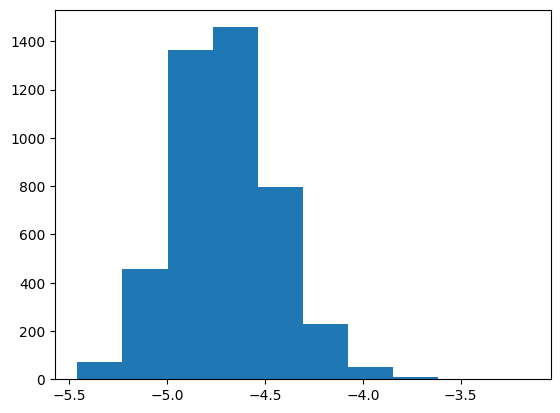

4441

In [19]:
survey = 'sdss'
df = pd.read_csv(f'~/Documents/thesis/thesis-research-2.0/data/foundation/fp_sample/outlier_reject/smin_setting_0/{survey}.csv')

plt.hist(np.log(df['es']))
print(np.mean(np.log(df['es'])))
print(np.std(np.log(df['es'])))
plt.show()

len(df)

In [5]:
pd.read_csv('/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/artifacts/fp_fit/smin_setting_0/fp_fits.csv')

,Unnamed: 0,a,b,rmean,smean,imean,s1,s2,s3
0,6dFGS,1.471730,-0.806519,0.092153,2.239280,3.362297,0.048579,0.342185,0.165073
1,SDSS,1.291947,-0.869764,0.034680,2.188790,3.305817,0.049716,0.278970,0.197865
2,LAMOST,1.427039,-0.802021,-0.095520,2.159125,3.399648,0.059564,0.298871,0.199731


# 3. Create Contour Plot

In [11]:
def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(x, y, hist_bins, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
    """
    nbins_x = hist_bins
    nbins_y = hist_bins
    
    H, xedges, yedges = np.histogram2d(x, y, bins=(nbins_x, nbins_y), density=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1, nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y, 1))

    pdf = (H * (x_bin_sizes * y_bin_sizes))

    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.3934693402873665))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.8646647167633873))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.9888910034617577))
    levels = sorted([one_sigma, two_sigma, three_sigma])

    X, Y = 0.5*(xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1])
    Z = pdf.T

    if ax == None:
        plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    
    return contour

## 3.1. 6dFGS

In [12]:
mock = pd.read_csv('../src/mocks/GENRMOCKFP_6dF/mockfpj_v3camp_zmsqc_1.txt', delim_whitespace=True)
# mock['mock_no'] = mock['#mockgal_ID'].apply(lambda x: int(x.split('_')[1]))
# mock = mock[mock['mock_no'] == 2]
rmock = mock['r'].to_numpy()
smock = mock['s'].to_numpy()
imock = mock['i'].to_numpy()

data = pd.read_csv('../data/foundation/fp_sample/outlier_reject/smin_setting_0/6dfgs.csv')
rdata = data['r'].to_numpy()
sdata = data['s'].to_numpy()
idata = data['i'].to_numpy()

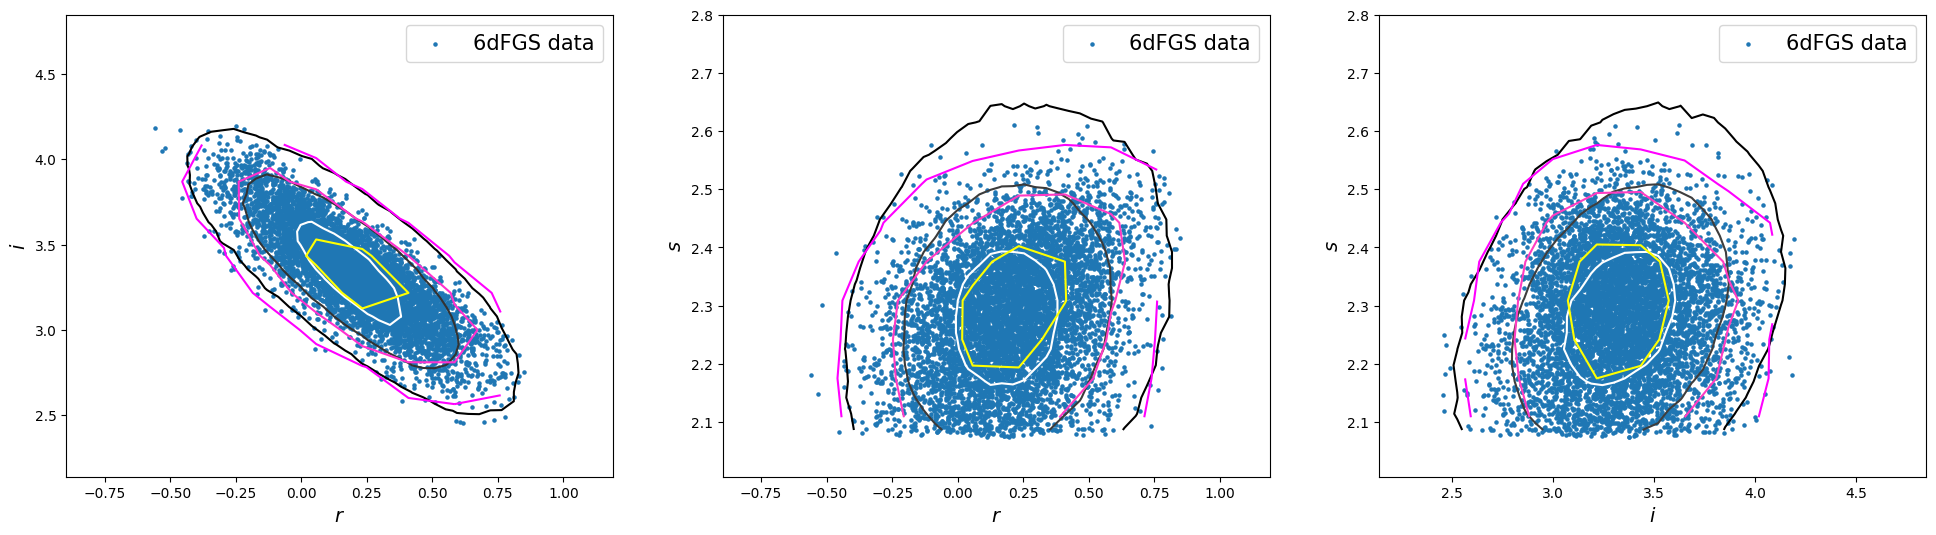

In [14]:
MOCK_CMAP = 'gist_gray'
DATA_CMAP = 'spring'
MOCK_BINS = 50
DATA_BINS = 8

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

density_contour(rmock, imock, MOCK_BINS, ax=ax1, cmap=MOCK_CMAP)
density_contour(rdata, idata, DATA_BINS, ax=ax1, cmap=DATA_CMAP)
# ax1.scatter(rmock, imock, s=1, label='6dFGS mock sample')
ax1.scatter(rdata, idata, s=5, label='6dFGS data')
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$r$', fontsize=14)
ax1.set_ylabel(r'$i$', fontsize=14)

density_contour(rmock, smock, MOCK_BINS, ax=ax2, cmap=MOCK_CMAP)
density_contour(rdata, sdata, DATA_BINS, ax=ax2, cmap=DATA_CMAP)
ax2.scatter(rdata, sdata, s=5, label='6dFGS data')
ax2.legend(fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=14)
ax2.set_ylabel(r'$s$', fontsize=14)
ax2.set_ylim(top=2.8)

density_contour(imock, smock, MOCK_BINS, ax=ax3, cmap=MOCK_CMAP)
density_contour(idata, sdata, DATA_BINS, ax=ax3, cmap=DATA_CMAP)
ax3.scatter(idata, sdata, s=5, label='6dFGS data')
ax3.legend(fontsize=15)
ax3.set_xlabel(r'$i$', fontsize=14)
ax3.set_ylabel(r'$s$', fontsize=14)
ax3.set_ylim(top=2.8)

plt.show()

## 3.2. SDSS

In [15]:
mock0 = pd.read_csv('../src/mocks/GENRMOCKFP_SDSS/sdss_mock_smin_setting_0.txt', delim_whitespace=True)
rmock0 = mock0['r'].to_numpy()
smock0 = mock0['s'].to_numpy()
imock0 = mock0['i'].to_numpy()

mock1 = pd.read_csv('../src/mocks/GENRMOCKFP_SDSS/sdss_mock_smin_setting_1.txt', delim_whitespace=True)
rmock1 = mock1['r'].to_numpy()
smock1 = mock1['s'].to_numpy()
imock1 = mock1['i'].to_numpy()

data0 = pd.read_csv('../data/foundation/fp_sample/outlier_reject/smin_setting_0/sdss.csv')
rdata0 = data0['r'].to_numpy()
sdata0 = data0['s'].to_numpy()
idata0 = data0['i'].to_numpy()

data1 = pd.read_csv('../data/foundation/fp_sample/outlier_reject/smin_setting_1/sdss.csv')
rdata1 = data1['r'].to_numpy()
sdata1 = data1['s'].to_numpy()
idata1 = data1['i'].to_numpy()

### 3.2.1. SDSS Full ($s_\mathrm{min}$ = 1.0845)

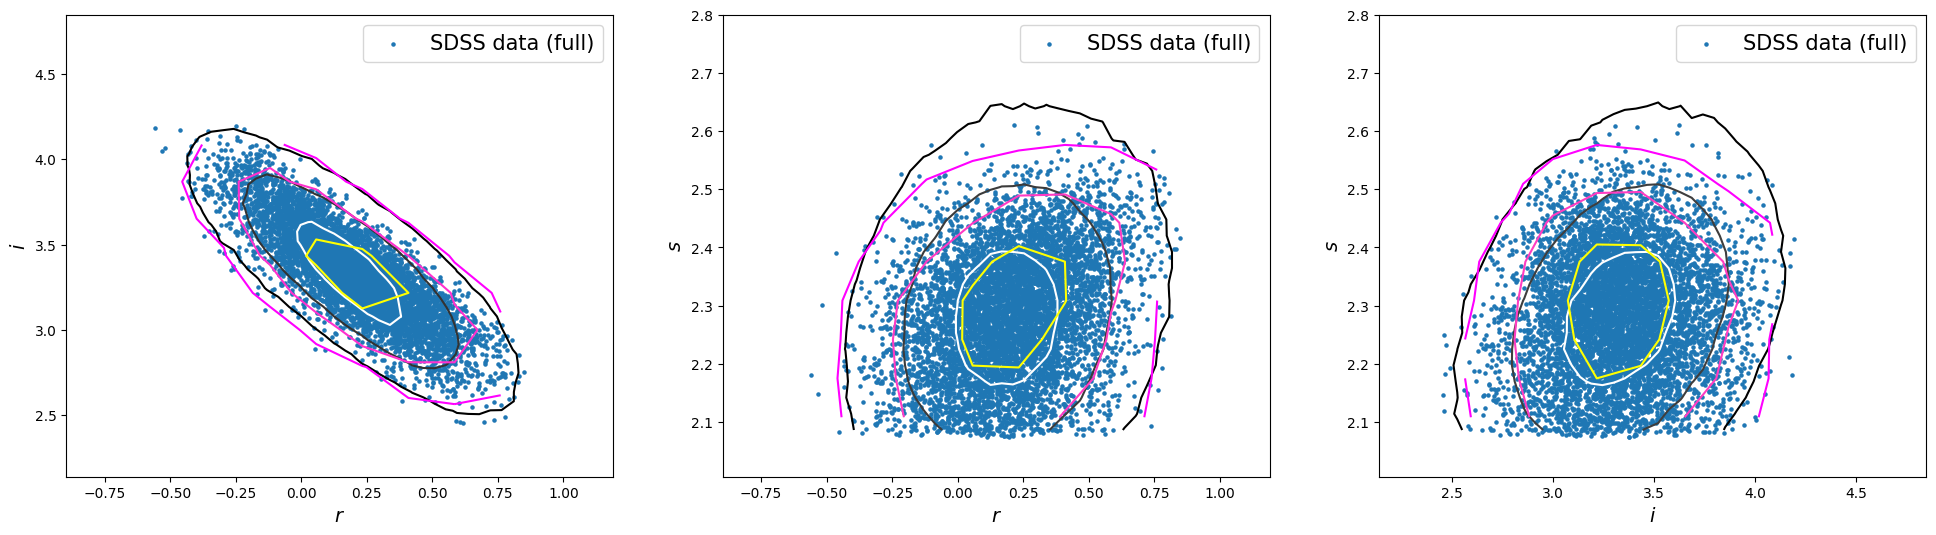

In [16]:
MOCK_CMAP = 'gist_gray'
DATA_CMAP = 'spring'
MOCK_BINS = 50
DATA_BINS = 8

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

density_contour(rmock, imock, MOCK_BINS, ax=ax1, cmap=MOCK_CMAP)
density_contour(rdata, idata, DATA_BINS, ax=ax1, cmap=DATA_CMAP)
# ax1.scatter(rmock, imock, s=1, label='6dFGS mock sample')
ax1.scatter(rdata, idata, s=5, label='SDSS data (full)')
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$r$', fontsize=14)
ax1.set_ylabel(r'$i$', fontsize=14)

density_contour(rmock, smock, MOCK_BINS, ax=ax2, cmap=MOCK_CMAP)
density_contour(rdata, sdata, DATA_BINS, ax=ax2, cmap=DATA_CMAP)
ax2.scatter(rdata, sdata, s=5, label='SDSS data (full)')
ax2.legend(fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=14)
ax2.set_ylabel(r'$s$', fontsize=14)
ax2.set_ylim(top=2.8)

density_contour(imock, smock, MOCK_BINS, ax=ax3, cmap=MOCK_CMAP)
density_contour(idata, sdata, DATA_BINS, ax=ax3, cmap=DATA_CMAP)
ax3.scatter(idata, sdata, s=5, label='SDSS data (full)')
ax3.legend(fontsize=15)
ax3.set_xlabel(r'$i$', fontsize=14)
ax3.set_ylabel(r'$s$', fontsize=14)
ax3.set_ylim(top=2.8)

plt.show()

[6.620130570563263e-05, 0.0007786534569218294, 0.003630263453252863]
[7.02260708510489e-05, 0.0007748917747887499, 0.003003367002874701]


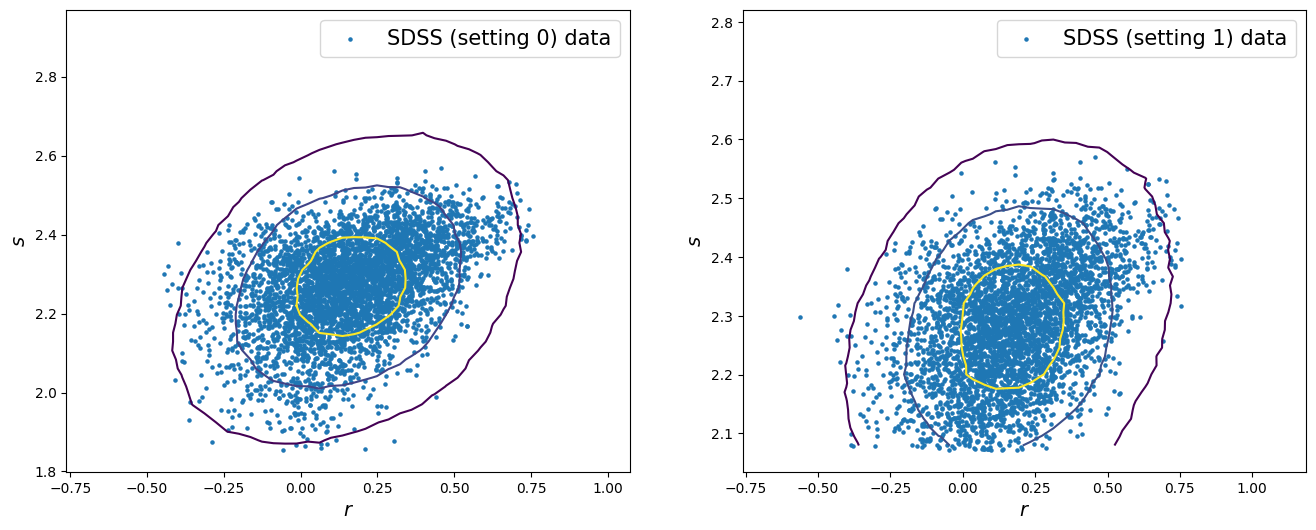

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
density_contour(rmock0, smock0, 50, 50, rdata0, sdata0, 'SDSS (setting 0)', ax=ax1)
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$r$', fontsize=14)
ax1.set_ylabel(r'$s$', fontsize=14)

density_contour(rmock1, smock1, 50, 50, rdata1, sdata1, 'SDSS (setting 1)', ax=ax2)
ax2.legend(fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=14)
ax2.set_ylabel(r'$s$', fontsize=14)

plt.show()

[6.935374920229363e-05, 0.0008214366140943085, 0.003851384821940695]
[7.407407358970808e-05, 0.0007686387688568462, 0.0030553150566603442]


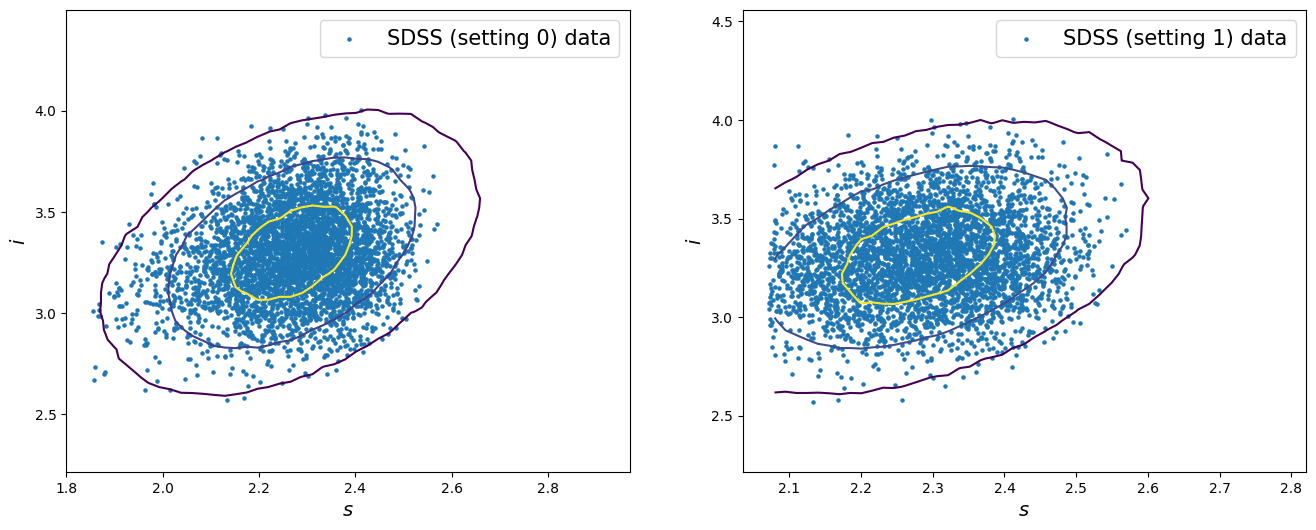

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
density_contour(smock0, imock0, 50, 50, sdata0, idata0, 'SDSS (setting 0)', ax=ax1)
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$i$', fontsize=14)

density_contour(smock1, imock1, 50, 50, sdata1, idata1, 'SDSS (setting 1)', ax=ax2)
ax2.legend(fontsize=15)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$i$', fontsize=14)

plt.show()

### Plot the mocks only

[6.935374920229363e-05, 0.0008214366140943085, 0.003851384821940695]
[7.407407358970808e-05, 0.0007686387688568462, 0.0030553150566603442]


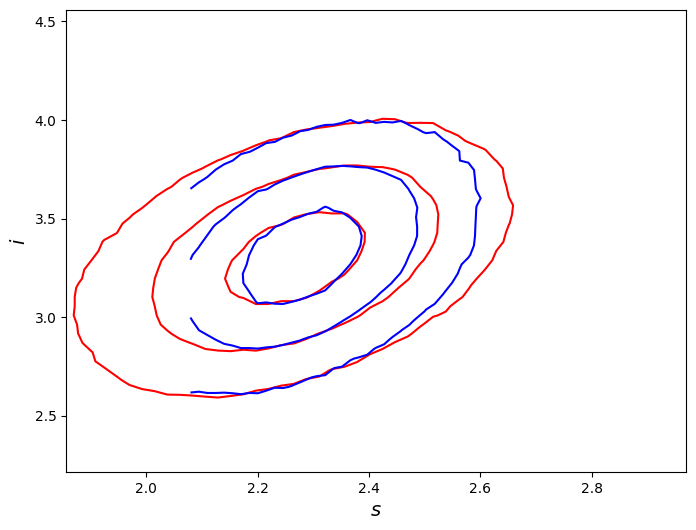

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
density_contour(smock0, imock0, 50, 50, sdata0, idata0, 'SDSS (setting 0)', ax=ax, with_data=False, colors='red')
density_contour(smock1, imock1, 50, 50, sdata0, idata0, 'SDSS (setting 1)', ax=ax, with_data=False, colors='blue')
ax.set_xlabel(r'$s$', fontsize=14)
ax.set_ylabel(r'$i$', fontsize=14)
# ax.set_xlim(left=2.0725)

plt.show()

[6.620130570563458e-05, 0.0007786534569218283, 0.0036302634532528622]
[7.022607085104977e-05, 0.0007748917747887507, 0.0030033670028747003]


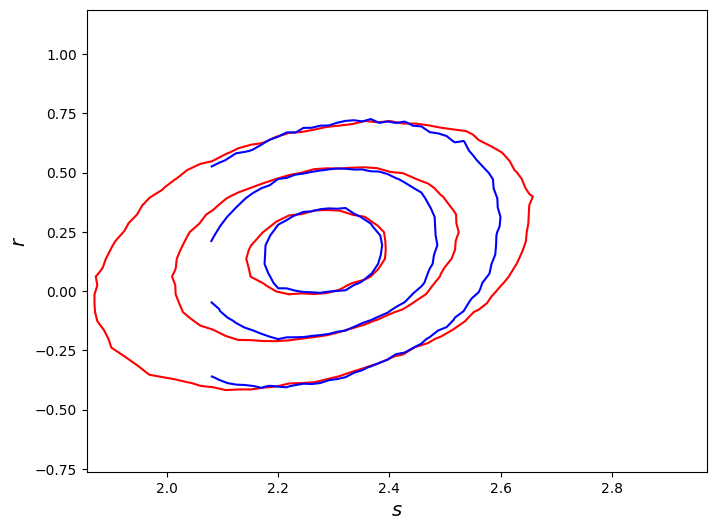

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
density_contour(smock0, rmock0, 50, 50, sdata0, rdata0, 'SDSS (setting 0)', ax=ax, with_data=False, colors='red')
density_contour(smock1, rmock1, 50, 50, sdata0, rdata0, 'SDSS (setting 1)', ax=ax, with_data=False, colors='blue')
ax.set_xlabel(r'$s$', fontsize=14)
ax.set_ylabel(r'$r$', fontsize=14)
# ax.set_xlim(left=2.0725)

plt.show()

[6.620130570563263e-05, 0.0007786534569218294, 0.003630263453252863]
[7.02260708510489e-05, 0.0007748917747887499, 0.003003367002874701]


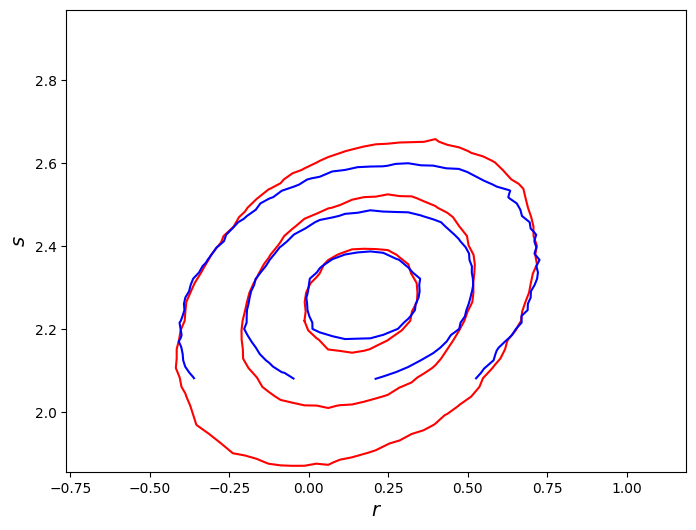

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
density_contour(rmock0, smock0, 50, 50, rdata0, sdata0, 'SDSS (setting 0)', ax=ax, with_data=False, colors='red')
density_contour(rmock1, smock1, 50, 50, rdata0, sdata0, 'SDSS (setting 1)', ax=ax, with_data=False, colors='blue')
ax.set_xlabel(r'$r$', fontsize=14)
ax.set_ylabel(r'$s$', fontsize=14)
# ax.set_xlim(left=2.0725)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
density_contour(rmock0, smock0, 50, 50, rdata0, sdata0, 'SDSS (setting 0)', ax=ax1)
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$r$', fontsize=14)
ax1.set_ylabel(r'$s$', fontsize=14)

density_contour(rmock1, smock1, 50, 50, rdata1, sdata1, 'SDSS (setting 1)', ax=ax2)
ax2.legend(fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=14)
ax2.set_ylabel(r'$s$', fontsize=14)

plt.show()

# 4. Fitting the mocks

## 4.1. 6dFGS

### 4.1.1. No outlier rejection

In [71]:
start = time.time()

omega_m = 0.3121
mag_low = 8.0
mag_high = 13.65
zmin = 3000.0 / LIGHTSPEED
zmax = 16120. / LIGHTSPEED

# Filepaths
MOCK_FILEPATH = '../src/mocks/GENRMOCKFP_6dF/mockfpj_v3camp_zmsqc_1.txt'
MOCK_FIT_OUTPUT_FILEPATH = '../artifacts/mock_fits/no_outlier_reject/6dfgs.csv'

SMIN_SETTING = 0
Nfits = 100
survey = '6dFGS'

FP_mocks = []
for i in range(Nfits):
    print(f'Iteration {i + 1}/{Nfits}')
    data = pd.read_csv(MOCK_FILEPATH, delim_whitespace=True)
    data['mock_ID'] = data['#mockgal_ID'].map(lambda x: int(x.split('_')[1]))
    data = data[data['mock_ID']== i + 1]

    # The range of the FP parameters' values allowed
    avals, bvals = (1.3, 1.8), (-1.0, -0.5)
    rvals, svals, ivals = (-0.5, 0.5), (2.0, 2.5), (3.0, 3.5)
    s1vals, s2vals, s3vals = (0., 0.3), (0.1, 0.5), (0.1, 0.3)
    Sn = data['Sprob'].to_numpy()
    FPparams = sp.optimize.differential_evolution(FP_func, bounds=(avals, bvals, rvals, svals, ivals, s1vals, s2vals, s3vals), 
        args=(0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin), maxiter=10000, tol=1.0e-6)
    chi_squared = Sn*FP_func(FPparams.x, 0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin, sumgals=False, chi_squared_only=True)[0]
    print(FPparams.x, np.sum(chi_squared), len(data))

    # Store the FP fits
    FP_mocks.append(FPparams.x)

# Save fits as csv
FP_mocks = np.array(FP_mocks)
mocks_df = pd.DataFrame(FP_mocks).rename(columns={0: 'a', 1: 'b', 2: 'rmean', 3: 'smean', 4: 'imean', 5: 'sigma1', 6: 'sigma2', 7: 'sigma3'})
mocks_df.to_csv(MOCK_FIT_OUTPUT_FILEPATH, index=False)

print(f"Time elapsed = {time.time() - start}")

Iteration 1/100
[ 1.45776541 -0.81430514  0.07556003  2.23350509  3.37246397  0.04993948
  0.34592778  0.17049988] 19666.951218061287 6974
Iteration 2/100
[ 1.50073329 -0.81656515  0.09426315  2.24213937  3.36322802  0.048312
  0.34882272  0.16350368] 19377.59699443977 6974
Iteration 3/100
[ 1.442128   -0.80135028  0.09665612  2.24107582  3.36066902  0.04720044
  0.33534589  0.16516645] 19828.71849319836 6974
Iteration 4/100
[ 1.50084527 -0.79614966  0.09500767  2.24059276  3.35929299  0.04848947
  0.34142226  0.16656573] 19184.69283202554 6974
Iteration 5/100
[ 1.45686782 -0.7966748   0.09530684  2.23808353  3.35887458  0.04837915
  0.34814209  0.16808811] 19300.238136736734 6974
Iteration 6/100
[ 1.47466649 -0.81055561  0.0873346   2.24095609  3.3727478   0.04891943
  0.34452131  0.16444347] 19342.971377671067 6974
Iteration 7/100
[ 1.47253762 -0.8298149   0.08710884  2.2377411   3.36908733  0.04960106
  0.35490186  0.16472558] 19212.18001327508 6974
Iteration 8/100
[ 1.48883117 -0.8

[ 1.51502603 -0.81064912  0.09413157  2.24141067  3.35872604  0.04649351
  0.34195569  0.16367015] 19699.143344507513 6974
Iteration 61/100
[ 1.45712741 -0.81617173  0.08835467  2.23623122  3.35873524  0.04712715
  0.33906197  0.16947499] 19787.20074505221 6974
Iteration 62/100
[ 1.49778414 -0.80698311  0.08985707  2.24261918  3.36841063  0.04936746
  0.34544974  0.1599094 ] 19292.512475469743 6974
Iteration 63/100
[ 1.48508776 -0.81109859  0.09198735  2.23970558  3.36225272  0.05035497
  0.33908974  0.16629873] 19347.644847551535 6974
Iteration 64/100
[ 1.4875803  -0.80410132  0.09093456  2.24124293  3.36340205  0.04853266
  0.33956716  0.16532874] 19627.89967683915 6974
Iteration 65/100
[ 1.45396309 -0.79421778  0.09130834  2.23743011  3.36113101  0.04599903
  0.3435987   0.16478059] 19586.83629454993 6974
Iteration 66/100
[ 1.44108937 -0.80399766  0.0949403   2.23668555  3.35654002  0.04807806
  0.33910654  0.1668484 ] 19720.044565173514 6974
Iteration 67/100
[ 1.46550555 -0.8155316

OSError: Cannot save file into a non-existent directory: '../artifacts/mock_fits'

### 4.1.2. With outlier rejection

In [53]:
start = time.time()

np.random.seed(42)

omega_m = 0.3121
mag_low = 8.0
mag_high = 13.65
zmin = 3000.0 / LIGHTSPEED
zmax = 16120. / LIGHTSPEED

# Mock filepath
MOCK_FILEPATH = '../src/mocks/GENRMOCKFP_6dF/mockfpj_v3camp_zmsqc_1.txt'

SMIN_SETTING = 0
NFITS = 100
survey = '6dFGS'

# p-value upper limit, reject galaxies with p-value lower than this limit
pvals_cut = 0.01
# Velocity dispersion lower limit
smin = SURVEY_VELDISP_LIMIT[SMIN_SETTING][survey]

# Load the mock file
mocks = pd.read_csv(MOCK_FILEPATH, delim_whitespace=True)
mocks['mock_no'] = mocks['#mockgal_ID'].apply(lambda x: int(x.split('_')[1]))
mocks['z'] = mocks['cz'] / LightSpeed

FP_mocks = []
for mock_no in range(1, NFITS + 1):
    print(f'Iteration: {mock_no}/{NFITS}')
    df = mocks[mocks['mock_no'] == mock_no]
    Sn = df['Sprob'].to_numpy()

    # Fitting the FP iteratively by rejecting galaxies with high chi-square (low p-values) in each iteration
    data_fit = df
    badcount = len(df)
    is_converged = False
    i = 1

    while not is_converged:
        Snfit = data_fit['Sprob'].to_numpy()

        # The range of the FP parameters' values
        avals, bvals = (1.0, 1.8), (-1.0, -0.5)
        rvals, svals, ivals = (-0.5, 0.5), (2.0, 2.5), (3.0, 3.5)
        s1vals, s2vals, s3vals = (0., 0.3), (0.1, 0.5), (0.1, 0.3)

        # Fit the FP parameters
        FPparams = sp.optimize.differential_evolution(FP_func, bounds=(avals, bvals, rvals, svals, ivals, s1vals, s2vals, s3vals), 
            args=(0.0, data_fit["z"].to_numpy(), data_fit["r"].to_numpy(), data_fit["s"].to_numpy(), data_fit["i"].to_numpy(), data_fit["dr"].to_numpy(), data_fit["ds"].to_numpy(), data_fit["di"].to_numpy(), Snfit, smin), maxiter=10000, tol=1.0e-6)
        # Calculate the chi-squared 
        chi_squared = Sn*FP_func(FPparams.x, 0.0, df["z"].to_numpy(), df["r"].to_numpy(), df["s"].to_numpy(), df["i"].to_numpy(), df["dr"].to_numpy(), df["ds"].to_numpy(), df["di"].to_numpy(), Sn, smin, sumgals=False, chi_squared_only=True)[0]

        # Calculate the p-value (x,dof)
        pvals = sp.stats.chi2.sf(chi_squared, np.sum(chi_squared)/(len(df) - 8.0))
        # Reject galaxies with p-values < pvals_cut
        data_fit = df.drop(df[pvals < pvals_cut].index).reset_index(drop=True)
        # Count the number of rejected galaxies
        badcountnew = len(np.where(pvals < pvals_cut)[0])
        # Converged if the number of rejected galaxies in this iteration is the same as previous iteration
        is_converged = True if badcount == badcountnew else False

        # Set the new count of rejected galaxies
        badcount = badcountnew
        i += 1

    # Store the FP parameters
    FP_mocks.append(FPparams.x)
    FP_mocks = np.array(FP_mocks)
    mocks_df = pd.DataFrame(FP_mocks).rename(columns={0: 'a', 1: 'b', 2: 'rmean', 3: 'smean', 4: 'imean', 5: 'sigma1', 6: 'sigma2', 7: 'sigma3'})
    
print(f"Time elapsed = {time.time() - start}")

Iteration: 1/100
Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Iteration: 5/100
Iteration: 6/100
Iteration: 7/100
Iteration: 8/100
Iteration: 9/100
Iteration: 10/100
Iteration: 11/100
Iteration: 12/100
Iteration: 13/100
Iteration: 14/100
Iteration: 15/100
Iteration: 16/100
Iteration: 17/100
Iteration: 18/100
Iteration: 19/100
Iteration: 20/100
Iteration: 21/100
Iteration: 22/100
Iteration: 23/100
Iteration: 24/100
Iteration: 25/100
Iteration: 26/100
Iteration: 27/100
Iteration: 28/100
Iteration: 29/100
Iteration: 30/100
Iteration: 31/100
Iteration: 32/100
Iteration: 33/100
Iteration: 34/100
Iteration: 35/100
Iteration: 36/100
Iteration: 37/100
Iteration: 38/100
Iteration: 39/100
Iteration: 40/100
Iteration: 41/100
Iteration: 42/100
Iteration: 43/100
Iteration: 44/100
Iteration: 45/100
Iteration: 46/100
Iteration: 47/100
Iteration: 48/100
Iteration: 49/100
Iteration: 50/100
Iteration: 51/100
Iteration: 52/100
Iteration: 53/100
Iteration: 54/100
Iteration: 55/100
Iteration: 56/100
I

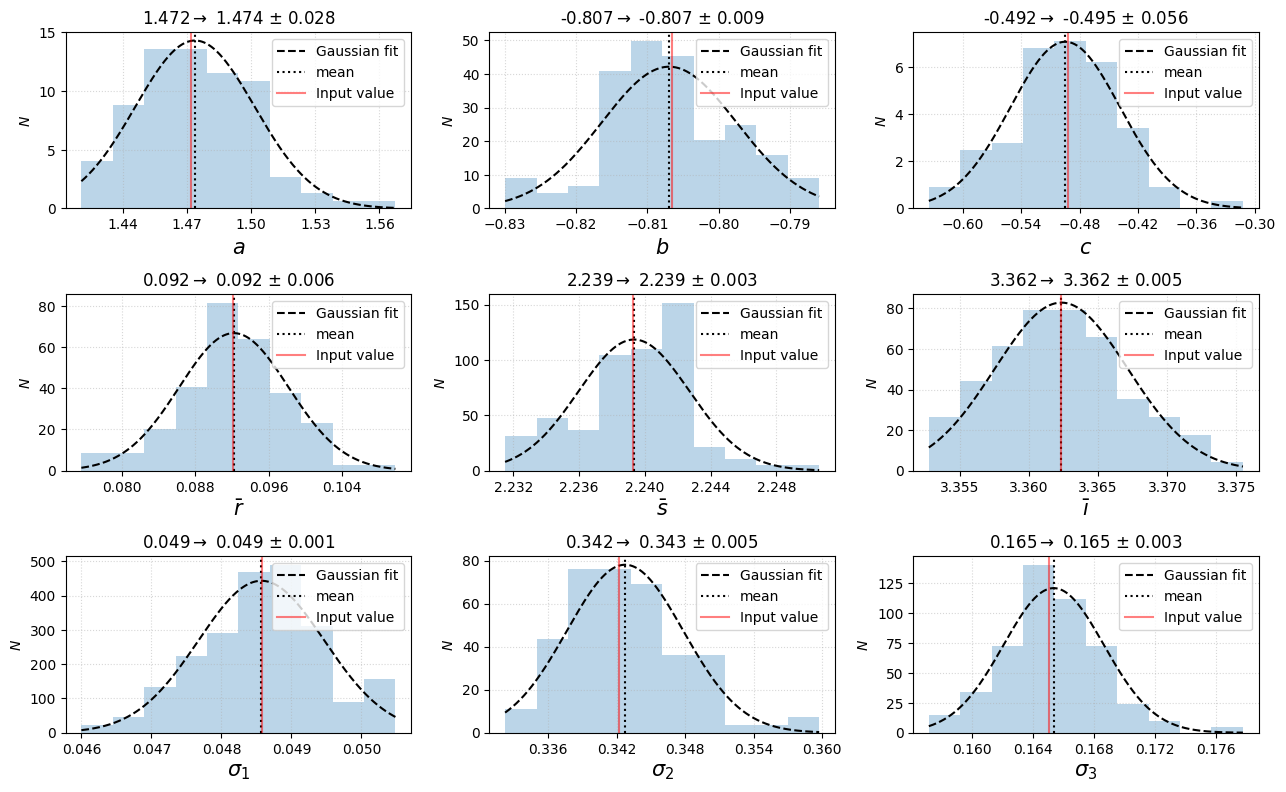

In [89]:
survey = '6dFGS'
SMIN_SETTING = 0

# Open the mock fits file
data = pd.read_csv('../artifacts/mock_fits/no_outlier_reject/6dfgs.csv')
data['c'] = data['rmean'] - data['a'] * data['smean'] - data['b'] * data['imean']

# Store the previous values (hard-coded)
prev_vals = pd.read_csv(f'../artifacts/fp_fit/smin_setting_{SMIN_SETTING}/fp_fits.csv', index_col=0).loc[survey].rename({'s1': 'sigma1', 's2': 'sigma2', 's3': 'sigma3'})
prev_vals['c'] = prev_vals['rmean'] - prev_vals['a']*prev_vals['smean']-prev_vals['b']*prev_vals['imean']

# FP parameters' labels
params_label = 'a b c rmean smean imean sigma1 sigma2 sigma3'.split()

# Data summary
# Mean and std for each parameter
data_summary = data.describe().loc[['mean','std']]

# Figure stuff
golden_ratio = 1.618
height = 8

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(golden_ratio * height, height))
# Number of bins
N = 10
# LaTeX-friendly labels for the x-axes
params_xlabel = ['a','b','c',r'\bar{r}',r'\bar{s}',r'\bar{\imath}',r'\sigma_1',r'\sigma_2',r'\sigma_3']

for i, ax in enumerate(fig.axes):
    
    # To plot the Gaussian fits
    x = np.linspace(np.min(data[params_label[i]]), np.max(data[params_label[i]]), 1000)
    y = norm.pdf(x, loc=data_summary.loc['mean',params_label[i]], scale=data_summary.loc['std',params_label[i]])
    
    # Plot the distribution and the Gaussian fits
    ax.hist(data[params_label[i]], bins=N, alpha=0.3, density=True)
    ax.plot(x, y, color='black', label='Gaussian fit', ls='--')
    
    # Plot the mean of the Gaussian fits and the previous values
    ax.axvline(x=data_summary.loc['mean', params_label[i]], color='black', label='mean', ls=':')
    ax.axvline(x=prev_vals[params_label[i]], color='red', label='Input value', alpha=0.5)
    
    # Axes labels
    ax.set_xlabel(r'${}$'.format(params_xlabel[i]), fontsize=15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_ylabel(r'$N$')
    
    # Grid
    ax.grid(ls=':',alpha=0.5)
    
    # Axes titles (previous values -> new values+-std)
    ax.set_title('%.3f' % prev_vals[params_label[i]] + r'$\rightarrow$ %.3f' % data_summary.loc['mean',params_label[i]] + ' $\pm$ %.3f' % data_summary.loc['std',params_label[i]])
    ax.legend(loc='upper right')

fig.tight_layout(pad=1.0)
# fig.savefig('../images/6df_mock.pdf', dpi=400)

## 4.2. SDSS

### 4.2.1. No outlier rejection, full data

In [8]:
start = time.time()

omega_m = 0.3121
mag_low = 8.0
mag_high = 13.65
zmin = 3000.0 / LIGHTSPEED
zmax = 16120. / LIGHTSPEED

# Filepaths
MOCK_FILEPATH = '../src/mocks/GENRMOCKFP_SDSS/sdss_mock_smin_setting_0.txt'
MOCK_FIT_OUTPUT_FILEPATH = '../artifacts/mock_fits/no_outlier_reject/sdss_0_full.csv'

SMIN_SETTING = 0
Nfits = 100
survey = 'SDSS'

FP_mocks = []
for i in range(Nfits):
    print(f'Iteration {i + 1}/{Nfits}')
    data = pd.read_csv(MOCK_FILEPATH, delim_whitespace=True)
    data['mock_ID'] = data['#mockgal_ID'].map(lambda x: int(x.split('_')[1]))
    data = data[data['mock_ID']== i + 1]
    
    # Veldisp cut
    smin = SURVEY_VELDISP_LIMIT[SMIN_SETTING][survey]

    # The range of the FP parameters' values allowed
    avals, bvals = (1.1, 1.8), (-1.0, -0.5)
    rvals, svals, ivals = (-0.5, 0.5), (2.0, 2.5), (3.0, 3.5)
    s1vals, s2vals, s3vals = (0., 0.3), (0.1, 0.5), (0.1, 0.3)
    Sn = data['Sprob'].to_numpy()
    FPparams = sp.optimize.differential_evolution(FP_func, bounds=(avals, bvals, rvals, svals, ivals, s1vals, s2vals, s3vals), 
        args=(0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin), maxiter=10000, tol=1.0e-6)
    chi_squared = Sn*FP_func(FPparams.x, 0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin, sumgals=False, chi_squared_only=True)[0]
    print(FPparams.x, np.sum(chi_squared), len(data))

    # Store the FP fits
    FP_mocks.append(FPparams.x)

# Save fits as csv
FP_mocks = np.array(FP_mocks)
mocks_df = pd.DataFrame(FP_mocks).rename(columns={0: 'a', 1: 'b', 2: 'rmean', 3: 'smean', 4: 'imean', 5: 'sigma1', 6: 'sigma2', 7: 'sigma3'})
mocks_df.to_csv(MOCK_FIT_OUTPUT_FILEPATH, index=False)

print(f"Time elapsed = {time.time() - start}")

Iteration 1/100
[ 1.29284541 -0.87898471  0.02494642  2.18595976  3.31202098  0.04962311
  0.28540129  0.19551091] 14143.253474411682 4441
Iteration 2/100
[ 1.28621048 -0.87208507  0.05052592  2.19547827  3.29977989  0.04880507
  0.27977859  0.19081971] 13692.420295180935 4441
Iteration 3/100
[ 1.35012822 -0.87749016  0.02267197  2.18763919  3.30932022  0.05122862
  0.27778599  0.20188922] 13540.670266179091 4441
Iteration 4/100
[ 1.30899306 -0.88075788  0.03148391  2.19228125  3.31760459  0.04856093
  0.28508616  0.19722135] 13927.78462748645 4441
Iteration 5/100
[ 1.26635033 -0.86183965  0.03490456  2.19119625  3.30977605  0.04926573
  0.27599518  0.1911744 ] 13816.80867959782 4441
Iteration 6/100
[ 1.26143636 -0.84183314  0.05386176  2.196333    3.29808847  0.05052246
  0.280185    0.19243516] 13667.61507110683 4441
Iteration 7/100
[ 1.25909555 -0.87158811  0.04015628  2.18572838  3.29811998  0.04864385
  0.26844042  0.20884969] 13792.159411112116 4441
Iteration 8/100
[ 1.24464385 -

[ 1.29756467 -0.86121733  0.03658672  2.19335371  3.30987653  0.04943926
  0.28240683  0.19288181] 13961.425159844506 4441
Iteration 61/100
[ 1.25386133 -0.8542045   0.03139576  2.18617712  3.30920129  0.04867687
  0.28343148  0.19885676] 13623.92772872942 4441
Iteration 62/100
[ 1.28581194 -0.87179837  0.03709423  2.19734549  3.31631413  0.04948839
  0.2799475   0.18637713] 14030.354488704608 4441
Iteration 63/100
[ 1.30660572 -0.86436307  0.0422916   2.18871315  3.29320237  0.04892274
  0.27206771  0.19985097] 13812.559597411342 4441
Iteration 64/100
[ 1.28576381 -0.86055478  0.03673056  2.19365108  3.31168642  0.0490394
  0.27827946  0.19382822] 14087.450598560801 4441
Iteration 65/100
[ 1.28241399 -0.85471139  0.039795    2.19303968  3.30816461  0.05068412
  0.28172441  0.19207883] 13688.74753580505 4441
Iteration 66/100
[ 1.32879597 -0.88655148  0.03017769  2.19121458  3.30891229  0.05025472
  0.28786973  0.19609839] 13732.119229830121 4441
Iteration 67/100
[ 1.30068847 -0.8710848

### 4.2.2. No outlier rejection, censored data

In [11]:
start = time.time()

omega_m = 0.3121
mag_low = 8.0
mag_high = 13.65
zmin = 3000.0 / LIGHTSPEED
zmax = 16120. / LIGHTSPEED

# Filepaths
MOCK_FILEPATH = '../src/mocks/GENRMOCKFP_SDSS/sdss_mock_smin_setting_0.txt'
MOCK_FIT_OUTPUT_FILEPATH = '../artifacts/mock_fits/no_outlier_reject/sdss_0_censored.csv'

SMIN_SETTING = 1
Nfits = 100
survey = 'SDSS'

# Veldisp cut
smin = SURVEY_VELDISP_LIMIT[SMIN_SETTING][survey]

FP_mocks = []
for i in range(Nfits):
    data = pd.read_csv(MOCK_FILEPATH, delim_whitespace=True)
    data = data[data['s'] >= smin]
    data['mock_ID'] = data['#mockgal_ID'].map(lambda x: int(x.split('_')[1]))
    data = data[data['mock_ID']== i + 1]
    print(f'Iteration {i + 1}/{Nfits}. Galaxies = {len(data)}')

    # The range of the FP parameters' values allowed
    avals, bvals = (1.1, 1.8), (-1.0, -0.5)
    rvals, svals, ivals = (-0.5, 0.5), (2.0, 2.5), (3.0, 3.5)
    s1vals, s2vals, s3vals = (0., 0.3), (0.1, 0.5), (0.1, 0.3)
    Sn = data['Sprob'].to_numpy()
    FPparams = sp.optimize.differential_evolution(FP_func, bounds=(avals, bvals, rvals, svals, ivals, s1vals, s2vals, s3vals), 
        args=(0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin), maxiter=10000, tol=1.0e-6)
    chi_squared = Sn*FP_func(FPparams.x, 0.0, data["cz"].to_numpy()/LightSpeed, data["r"].to_numpy(), data["s"].to_numpy(), data["i"].to_numpy(), data["dr"].to_numpy(), data["ds"].to_numpy(), data["di"].to_numpy(), Sn, smin, sumgals=False, chi_squared_only=True)[0]
    print(FPparams.x, np.sum(chi_squared), len(data))

    # Store the FP fits
    FP_mocks.append(FPparams.x)

# Save fits as csv
FP_mocks = np.array(FP_mocks)
mocks_df = pd.DataFrame(FP_mocks).rename(columns={0: 'a', 1: 'b', 2: 'rmean', 3: 'smean', 4: 'imean', 5: 'sigma1', 6: 'sigma2', 7: 'sigma3'})
mocks_df.to_csv(MOCK_FIT_OUTPUT_FILEPATH, index=False)

print(f"Time elapsed = {time.time() - start}")

Iteration 1/100. Galaxies = 4117
[ 1.30150373 -0.88026165  0.02725927  2.18973022  3.31378567  0.04959138
  0.2892167   0.19666905] 12594.233739930638 4117
Iteration 2/100. Galaxies = 4163
[ 1.30779777 -0.8789929   0.04548437  2.1955934   3.30418348  0.04831465
  0.28508671  0.19236592] 12419.330721722246 4163
Iteration 3/100. Galaxies = 4174
[ 1.31403941 -0.88590365  0.02688904  2.18665588  3.30705332  0.05087868
  0.27815533  0.20012608] 12543.493963551622 4174
Iteration 4/100. Galaxies = 4173
[ 1.29082319 -0.86370323  0.03355687  2.19319665  3.31816354  0.04888915
  0.28264645  0.19537892] 12849.919953941811 4173
Iteration 5/100. Galaxies = 4159
[ 1.27460021 -0.87163049  0.03472117  2.19138694  3.31032745  0.04886164
  0.27948772  0.19206597] 12569.949157423373 4159
Iteration 6/100. Galaxies = 4155
[ 1.31543457 -0.85456091  0.04545995  2.19194121  3.2963872   0.05023802
  0.28414929  0.20088324] 12336.452707135359 4155
Iteration 7/100. Galaxies = 4143
[ 1.30293153 -0.87552217  0.048

Iteration 54/100. Galaxies = 4158
[ 1.30141523 -0.8778319   0.04236697  2.19269974  3.30131801  0.04992798
  0.27516657  0.19310974] 12681.288465963136 4158
Iteration 55/100. Galaxies = 4151
[ 1.27153538 -0.85561332  0.02851444  2.18825493  3.314191    0.05104364
  0.28948458  0.19490132] 12483.338257349826 4151
Iteration 56/100. Galaxies = 4162
[ 1.25817399 -0.84920922  0.04309689  2.19007749  3.30215971  0.05005858
  0.27426892  0.19848055] 12543.528778371216 4162
Iteration 57/100. Galaxies = 4165
[ 1.27633045 -0.85756209  0.0391479   2.18726077  3.29754545  0.05055965
  0.27559987  0.19923098] 12601.752390142732 4165
Iteration 58/100. Galaxies = 4169
[ 1.36206402 -0.89097209  0.02571236  2.1897254   3.30954974  0.04994034
  0.27352854  0.1974515 ] 12897.636750154383 4169
Iteration 59/100. Galaxies = 4159
[ 1.26045323 -0.84395019  0.04580838  2.18942959  3.29716644  0.04995514
  0.27247564  0.19534631] 12581.364984172456 4159
Iteration 60/100. Galaxies = 4169
[ 1.30550603 -0.85813417

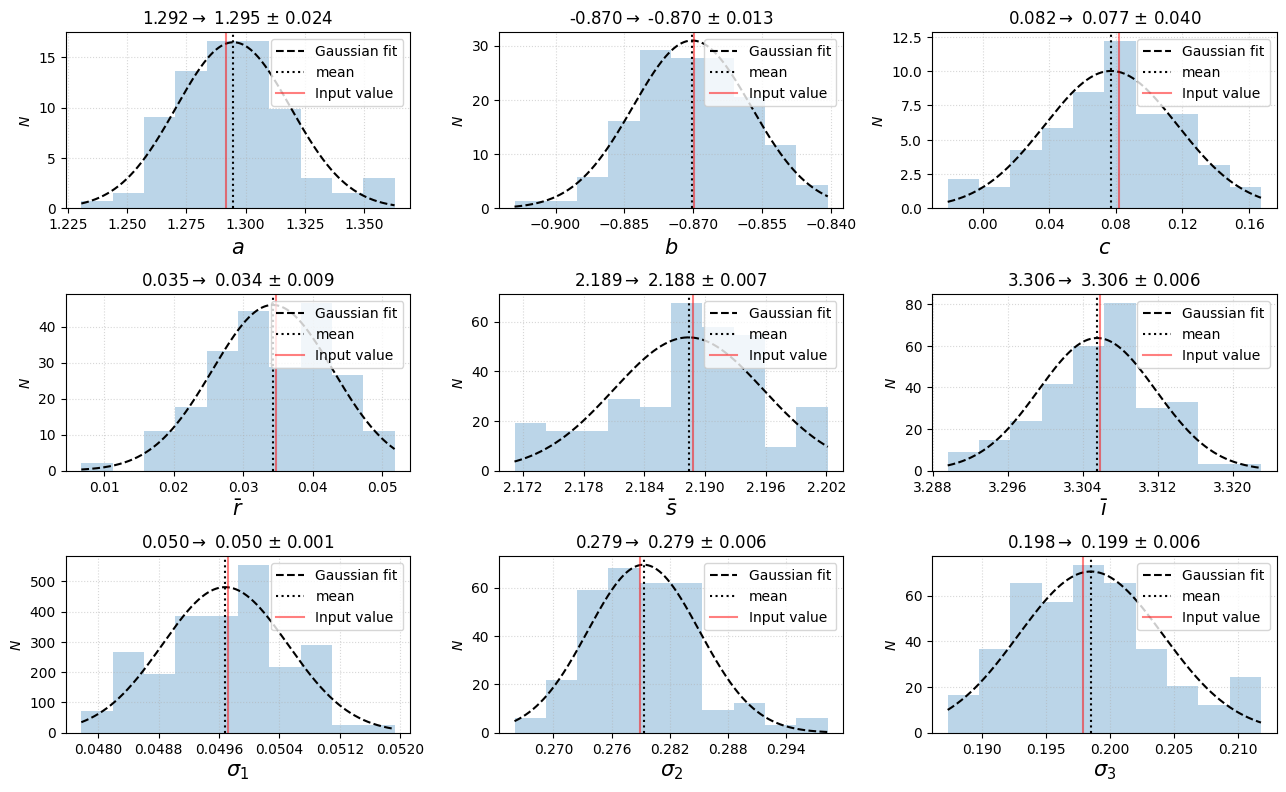

In [12]:
survey = 'SDSS'
SMIN_SETTING = 0

# Open the mock fits file
data = pd.read_csv('../artifacts/mock_fits/no_outlier_reject/sdss_0_censored.csv')
data['c'] = data['rmean'] - data['a'] * data['smean'] - data['b'] * data['imean']

# Store the previous values (hard-coded)
prev_vals = pd.read_csv(f'../artifacts/fp_fit/smin_setting_{SMIN_SETTING}/fp_fits.csv', index_col=0).loc[survey].rename({'s1': 'sigma1', 's2': 'sigma2', 's3': 'sigma3'})
prev_vals['c'] = prev_vals['rmean'] - prev_vals['a'] * prev_vals['smean'] - prev_vals['b'] * prev_vals['imean']

# FP parameters' labels
params_label = 'a b c rmean smean imean sigma1 sigma2 sigma3'.split()

# Data summary
# Mean and std for each parameter
data_summary = data.describe().loc[['mean','std']]

# Figure stuff
golden_ratio = 1.618
height = 8

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(golden_ratio * height, height))
# Number of bins
N = 10
# LaTeX-friendly labels for the x-axes
params_xlabel = ['a','b','c',r'\bar{r}',r'\bar{s}',r'\bar{\imath}',r'\sigma_1',r'\sigma_2',r'\sigma_3']

for i, ax in enumerate(fig.axes):
    
    # To plot the Gaussian fits
    x = np.linspace(np.min(data[params_label[i]]), np.max(data[params_label[i]]), 1000)
    y = norm.pdf(x, loc=data_summary.loc['mean',params_label[i]], scale=data_summary.loc['std',params_label[i]])
    
    # Plot the distribution and the Gaussian fits
    ax.hist(data[params_label[i]], bins=N, alpha=0.3, density=True)
    ax.plot(x, y, color='black', label='Gaussian fit', ls='--')
    
    # Plot the mean of the Gaussian fits and the previous values
    ax.axvline(x=data_summary.loc['mean', params_label[i]], color='black', label='mean', ls=':')
    ax.axvline(x=prev_vals[params_label[i]], color='red', label='Input value', alpha=0.5)
    
    # Axes labels
    ax.set_xlabel(r'${}$'.format(params_xlabel[i]), fontsize=15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_ylabel(r'$N$')
    
    # Grid
    ax.grid(ls=':',alpha=0.5)
    
    # Axes titles (previous values -> new values+-std)
    ax.set_title('%.3f' % prev_vals[params_label[i]] + r'$\rightarrow$ %.3f' % data_summary.loc['mean',params_label[i]] + ' $\pm$ %.3f' % data_summary.loc['std',params_label[i]])
    ax.legend(loc='upper right')

fig.tight_layout(pad=1.0)
# fig.savefig('../images/6df_mock.pdf', dpi=400)